Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

start_time_pandas = time.time()
df_pandas = pd.DataFrame({'Random Numbers': np.random.randint(1, 101, size=1_000_000)})
end_time_pandas = time.time()
time_pandas = end_time_pandas - start_time_pandas

start_time_numpy = time.time()
numpy_array = np.random.randint(1, 101, size=1_000_000)
end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy


print(f"Time taken using Pandas: {time_pandas:.4f} seconds")
print(f"Time taken using NumPy: {time_numpy:.4f} seconds")
print("NumPy is faster" if time_numpy < time_pandas else "Pandas is faster")


Time taken using Pandas: 0.0079 seconds
Time taken using NumPy: 0.0054 seconds
NumPy is faster


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [45]:
import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()
data = pd.read_csv('sleep_health.csv')
mean_values_pandas = data[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
end_time_pandas = time.time()

start_time_numpy = time.time()
data_numpy = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, dtype=float)
mean_values_numpy = np.mean(data_numpy[:, [1, 2, 3, 4, 5]], axis=0)
end_time_numpy = time.time()

correlation_pandas = data.select_dtypes(include=[np.number]).corr()
sleep_duration_age = correlation_pandas.loc['Sleep Duration', 'Age'] if 'Age' in correlation_pandas else None
sleep_duration_heart_rate = correlation_pandas.loc['Sleep Duration', 'Heart Rate'] if 'Heart Rate' in correlation_pandas else None
sleep_duration_daily_steps = correlation_pandas.loc['Sleep Duration', 'Daily Steps'] if 'Daily Steps' in correlation_pandas else None

correlation_numpy = np.corrcoef(data_numpy[:, [1, 6, 5]].T)  
sleep_duration_age_numpy = correlation_numpy[0, 1]
sleep_duration_daily_steps_numpy = correlation_numpy[0, 2]


std_pandas = data['Sleep Duration'].std()

std_numpy = np.std(data_numpy[:, 1], ddof=1)

time_taken_pandas = end_time_pandas - start_time_pandas
time_taken_numpy = end_time_numpy - start_time_numpy

print(f"Pandas Mean Values: {mean_values_pandas}")
print(f"NumPy Mean Values: {mean_values_numpy}")
print(f"Pandas Correlation (Sleep Duration & Age): {sleep_duration_age}")
print(f"Pandas Correlation (Sleep Duration & Heart Rate): {sleep_duration_heart_rate}")
print(f"Pandas Correlation (Sleep Duration & Daily Steps): {sleep_duration_daily_steps}")
print(f"NumPy Correlation (Sleep Duration & Age): {sleep_duration_age_numpy}")
print(f"NumPy Correlation (Sleep Duration & Daily Steps): {sleep_duration_daily_steps_numpy}")
print(f"Pandas Standard Deviation: {std_pandas}")
print(f"NumPy Standard Deviation: {std_numpy}")
print(f"Time taken using Pandas: {time_taken_pandas:.6f} seconds")
print(f"Time taken using NumPy: {time_taken_numpy:.6f} seconds")

if time_taken_pandas < time_taken_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Pandas Mean Values: Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
NumPy Mean Values: [        nan 42.18449198         nan  7.13208556  7.31283422]
Pandas Correlation (Sleep Duration & Age): 0.3447093581647443
Pandas Correlation (Sleep Duration & Heart Rate): -0.516454888517144
Pandas Correlation (Sleep Duration & Daily Steps): -0.039532537675731685
NumPy Correlation (Sleep Duration & Age): nan
NumPy Correlation (Sleep Duration & Daily Steps): nan
Pandas Standard Deviation: 0.7956567308898189
NumPy Standard Deviation: nan
Time taken using Pandas: 0.003987 seconds
Time taken using NumPy: 0.002995 seconds
NumPy is faster.


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

Columns in DataFrame: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
Pandas Mean Values: Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
NumPy Mean Values: [   7.13208556  128.55347594   84.64973262   70.1657754  6816.84491979]
Pandas Correlation Matrix:                           Sleep Duration       Age  Systolic blood pressure  \
Sleep Duration                  1.000000  0.344709                -0.180406   
Age                             0.344709  1.000000                 0.605878   
Systolic blood pressure        -0.180406  0.605878                 1.000000   
Diastolic blood pressure       -0.166570  0.593839               

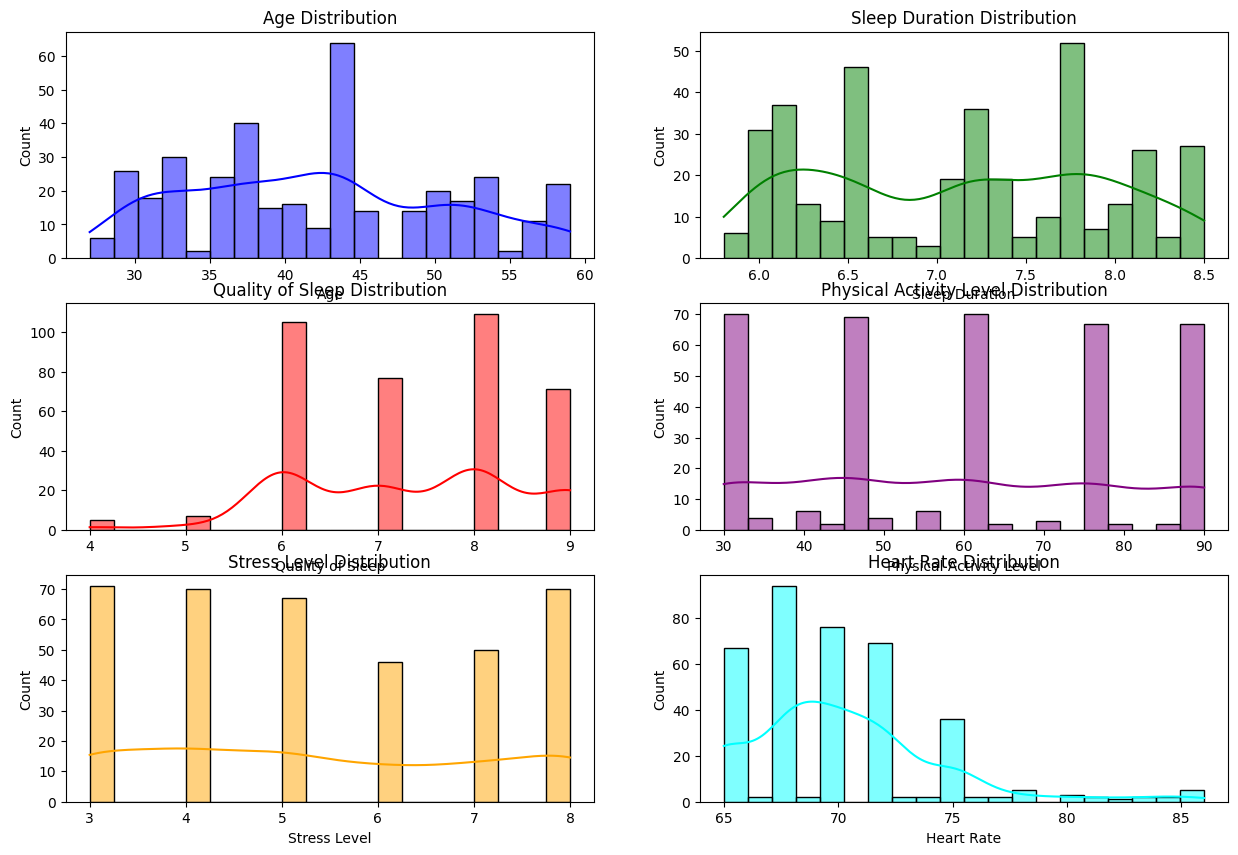

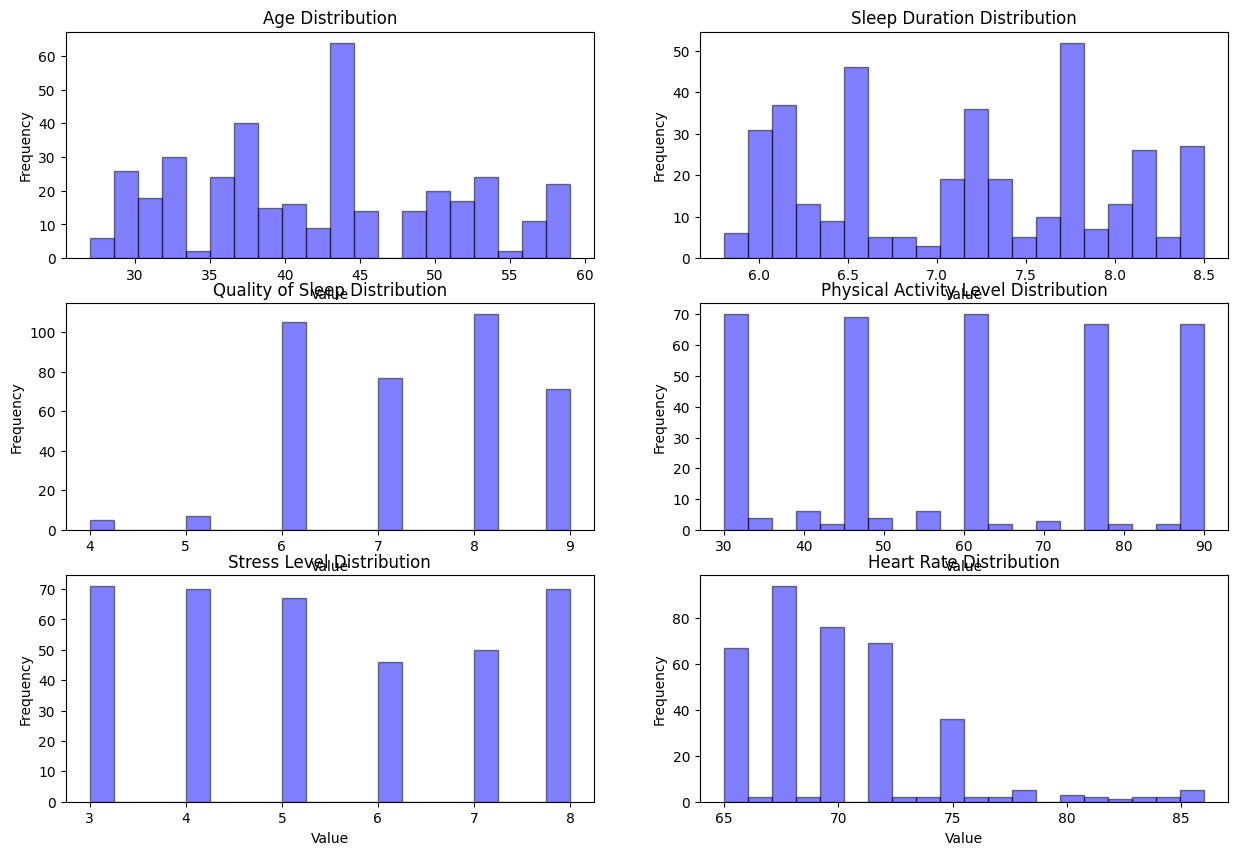

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

data = pd.read_csv('sleep_health.csv')
print("Columns in DataFrame:", data.columns.tolist())

mean_values_pandas = data[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Pandas Mean Values:", mean_values_pandas)

data_numpy = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, dtype=float, encoding='utf-8')
mean_values_numpy = np.nanmean(data_numpy[:, [4, 9, 10, 11, 12]], axis=0)
print("NumPy Mean Values:", mean_values_numpy)

correlation_pandas = data[['Sleep Duration', 'Age', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].corr()
print("Pandas Correlation Matrix:", correlation_pandas)

sleep_duration_age = correlation_pandas.loc['Sleep Duration', 'Age']
sleep_duration_heart_rate = correlation_pandas.loc['Sleep Duration', 'Heart Rate']
sleep_duration_daily_steps = correlation_pandas.loc['Sleep Duration', 'Daily Steps']
print(f"Sleep Duration and Age Correlation (Pandas): {sleep_duration_age}")
print(f"Sleep Duration and Heart Rate Correlation (Pandas): {sleep_duration_heart_rate}")
print(f"Sleep Duration and Daily Steps Correlation (Pandas): {sleep_duration_daily_steps}")

correlation_numpy = np.corrcoef(data_numpy[:, [4, 2, 11, 12]].T)
print("NumPy Correlation Matrix:", correlation_numpy)

sleep_duration_age_numpy = correlation_numpy[0, 1]
sleep_duration_heart_rate_numpy = correlation_numpy[0, 2]
sleep_duration_daily_steps_numpy = correlation_numpy[0, 3]
print(f"Sleep Duration and Age Correlation (NumPy): {sleep_duration_age_numpy}")
print(f"Sleep Duration and Heart Rate Correlation (NumPy): {sleep_duration_heart_rate_numpy}")
print(f"Sleep Duration and Daily Steps Correlation (NumPy): {sleep_duration_daily_steps_numpy}")

std_pandas = data['Sleep Duration'].std()
print(f"Pandas Standard Deviation for Sleep Duration: {std_pandas}")

std_numpy = np.nanstd(data_numpy[:, 4])
print(f"NumPy Standard Deviation for Sleep Duration: {std_numpy}")

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(3, 2, 2)
sns.histplot(data['Sleep Duration'], bins=20, kde=True, color='green')
plt.title('Sleep Duration Distribution')

plt.subplot(3, 2, 3)
sns.histplot(data['Quality of Sleep'], bins=20, kde=True, color='red')
plt.title('Quality of Sleep Distribution')

plt.subplot(3, 2, 4)
sns.histplot(data['Physical Activity Level'], bins=20, kde=True, color='purple')
plt.title('Physical Activity Level Distribution')

plt.subplot(3, 2, 5)
sns.histplot(data['Stress Level'], bins=20, kde=True, color='orange')
plt.title('Stress Level Distribution')

plt.subplot(3, 2, 6)
sns.histplot(data['Heart Rate'], bins=20, kde=True, color='cyan')
plt.title('Heart Rate Distribution')
plt.show()



def plot_distribution_numpy(data, column_index, title):
    plt.hist(data[:, column_index], bins=20, alpha=0.5, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plot_distribution_numpy(data_numpy, 2, 'Age Distribution')

plt.subplot(3, 2, 2)
plot_distribution_numpy(data_numpy, 4, 'Sleep Duration Distribution')

plt.subplot(3, 2, 3)
plot_distribution_numpy(data_numpy, 5, 'Quality of Sleep Distribution')

plt.subplot(3, 2, 4)
plot_distribution_numpy(data_numpy, 6, 'Physical Activity Level Distribution')

plt.subplot(3, 2, 5)
plot_distribution_numpy(data_numpy, 7, 'Stress Level Distribution')

plt.subplot(3, 2, 6)
plot_distribution_numpy(data_numpy, 11, 'Heart Rate Distribution')
plt.show()


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=data)
plt.title('Sleep Duration vs. Quality of Sleep (Pandas)')
plt.show()

sleep_duration_by_quality = [data_numpy[:, 1][data_numpy[:, 7] == i] for i in np.unique(data_numpy[:, 7])]
plt.boxplot(sleep_duration_by_quality)
plt.title('Sleep Duration vs. Quality of Sleep (NumPy)')
plt.show()
